# Setup the pre-requists and introduce the data set

In [66]:
#Set Prerequisits
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [67]:
#Mount gdrive
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [68]:
#Import the dataset asa Pandas data frame
df = pd.read_csv('/content/gdrive/My Drive/DataMining/assignment/dataset/banking.csv')
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,210,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,138,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,339,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,185,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,137,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1
5,30,management,divorced,basic.4y,no,yes,no,cellular,jul,tue,68,8,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,0
6,37,blue-collar,married,basic.4y,no,yes,no,cellular,may,thu,204,1,999,0,nonexistent,-1.8,92.893,-46.2,1.327,5099.1,0
7,39,blue-collar,divorced,basic.9y,no,yes,no,cellular,may,fri,191,1,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0
8,36,admin.,married,university.degree,no,no,no,cellular,jun,mon,174,1,3,1,success,-2.9,92.963,-40.8,1.266,5076.2,1
9,27,blue-collar,single,basic.4y,no,yes,no,cellular,apr,thu,191,2,999,1,failure,-1.8,93.075,-47.1,1.410,5099.1,0


# (a)I. Handle Missing Values and Outliers if any 


**Drop "Duration" column first:** the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this Input should only be included for 
benchmark purposes and should be discarded 

In [69]:
df = df.drop(['duration'],axis=1)
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [70]:
#Check for missing values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  object 
 14  emp_var_rate    41188 non-null  float64
 15  cons_price_idx  41188 non-null  float64
 16  cons_conf_idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

Eventhough there are no NULL values, there might be other custom values like "unknown" that suggest a missing values.

* To check this, we can get the unique values of the columns.

* Then we can check the missing value percentage in order to get an idea on handling the data.



---


Checking for unique values in each of the categorical features to check for other cases of missing values such as unknown and nonexistant

In [71]:
df['job'].unique()

array(['blue-collar', 'technician', 'management', 'services', 'retired',
       'admin.', 'housemaid', 'unemployed', 'entrepreneur',
       'self-employed', 'unknown', 'student'], dtype=object)

In [ ]:
df['marital'].unique()

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

In [ ]:
df['education'].unique()

array(['basic.4y', 'unknown', 'university.degree', 'high.school',
       'basic.9y', 'professional.course', 'basic.6y', 'illiterate'],
      dtype=object)

In [ ]:
df['default'].unique()

array(['unknown', 'no', 'yes'], dtype=object)

In [ ]:
df['housing'].unique()

array(['yes', 'no', 'unknown'], dtype=object)

In [ ]:
df['loan'].unique()

array(['no', 'yes', 'unknown'], dtype=object)

In [ ]:
df['contact'].unique()

array(['cellular', 'telephone'], dtype=object)

In [ ]:
df['month'].unique()

array(['aug', 'nov', 'jun', 'apr', 'jul', 'may', 'oct', 'mar', 'sep',
       'dec'], dtype=object)

In [ ]:
df['day_of_week'].unique()

array(['thu', 'fri', 'tue', 'mon', 'wed'], dtype=object)

In [ ]:
df['poutcome'].unique()

array(['nonexistent', 'success', 'failure'], dtype=object)

In [72]:
#Check for missing values in "job"
print('Unique Values in job column: ',df['job'].unique())

#Get the unkownvalue percentage out of the total number of
#data in the column in order to decide how to handle the missing values.
print('unkown entries percentage: ', len(df[df['job'] == 'unknown'])/len(df['job'])*100)

Unique Values in job column:  ['blue-collar' 'technician' 'management' 'services' 'retired' 'admin.'
 'housemaid' 'unemployed' 'entrepreneur' 'self-employed' 'unknown'
 'student']
unkown entries percentage:  0.8012042342429834


In [73]:
#There are "unknown" fields which we might have to handle
#As the missing value percentage is low, we can choose to
#remove the rows with the "unknown" entry
job_dropping_index = df[ df['job'] == 'unknown' ].index
df.drop(job_dropping_index, inplace = True)
df.shape

(40858, 20)

In [74]:
#Check for missing values in "marital"
print('Unique Values in job column: ',df['marital'].unique())

#Get the unkown value percentage out of the total number of
#data in the column in order to decide how to handle the missing values.
print('unkown entries percentage: ', len(df[df['marital'] == 'unknown'])/len(df['marital'])*100)

Unique Values in job column:  ['married' 'single' 'divorced' 'unknown']
unkown entries percentage:  0.17377257819766018


In [75]:
#As the missing value percentage is low, we can choose to remove the rows with the "unknown" entry
marital_dropping_index = df[ df['marital'] == 'unknown' ].index
df.drop(marital_dropping_index, inplace = True)
df.shape

(40787, 20)

In [76]:
#Check for missing values in "education"
print('Unique Values in job column: ',df['education'].unique())

#Get the unkown value percentage out of the total number of data in the column in order to decide how to handle the missing values.
print('unkown entries percentage: ', len(df[df['education'] == 'unknown'])/len(df['education'])*100)

Unique Values in job column:  ['basic.4y' 'unknown' 'university.degree' 'high.school' 'basic.9y'
 'professional.course' 'basic.6y' 'illiterate']
unkown entries percentage:  3.9130114987618607


In [77]:
#As the missing value percentage is low, we can choose to remove the rows with the "unknown" entry
education_dropping_index = df[ df['education'] == 'unknown' ].index
df.drop(education_dropping_index, inplace = True)
df.shape

(39191, 20)

In [78]:
#Check for missing values in "default"
print('Unique Values in job column: ',df['default'].unique())

#Get the unkown value percentage out of the total number of data in the column in order to decide how to handle the missing values.
print('unkown entries percentage: ', len(df[df['default'] == 'unknown'])/len(df['default'])*100)

Unique Values in job column:  ['unknown' 'no' 'yes']
unkown entries percentage:  20.320992064504605


20% is a considerable "unknown" percentage. Still, the percentage is not high enough to fully drop the column. How ever, removing the rows would result in a considerable effect on the final predictions. **Thus, decided to keep the "default" column as it is.**

In [79]:
#Check for missing values in "housing"
print('Unique Values in job column: ',df['housing'].unique())

#Get the unkown value percentage out of the total number of data in the column in order to decide how to handle the missing values.
print('unkown entries percentage: ', len(df[df['housing'] == 'unknown'])/len(df['housing'])*100)

Unique Values in job column:  ['yes' 'no' 'unknown']
unkown entries percentage:  2.4138194993748563


In [80]:
#As the missing value percentage is low, we can choose to remove the rows with the "unknown" entry
housing_dropping_index = df[ df['housing'] == 'unknown' ].index
df.drop(housing_dropping_index, inplace = True)
df.shape

(38245, 20)

In [81]:
#Check for missing values in "loan"
print('Unique Values in job column: ',df['loan'].unique())

#Get the unkown value percentage out of the total number of data in the column in order to decide how to handle the missing values.
print('unkown entries percentage: ', len(df[df['loan'] == 'unknown'])/len(df['loan'])*100)

Unique Values in job column:  ['no' 'yes']
unkown entries percentage:  0.0


When the housing column dropped the unknown rows, loan column has dropped its rows as well

In [ ]:
#Check for missing values in "poutcome"
print('Unique Values in job column: ',df['poutcome'].unique())

#Get the unkown value percentage out of the total number of data in the column in order to decide how to handle the missing values.
print('unkown entries percentage: ', len(df[df['poutcome'] == 'nonexistent'])/len(df['poutcome'])*100)

Unique Values in job column:  ['nonexistent' 'success' 'failure']
unkown entries percentage:  86.45836057000915


A very high **86% of missing values ** "nonexistant" are there in the poutcome column. As the missing data is extremely high, it will affect the final outcome if we use this column as a feature. Therefore, we can decide to drop this column.

In [82]:
df = df.drop(['poutcome'],axis=1)
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,1,999,0,1.4,93.444,-36.1,4.963,5228.1,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,3,6,2,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,2,999,0,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,1,3,1,-2.9,92.201,-31.4,0.869,5076.2,1
5,30,management,divorced,basic.4y,no,yes,no,cellular,jul,tue,8,999,0,1.4,93.918,-42.7,4.961,5228.1,0


Checking for Outliers and handling them.

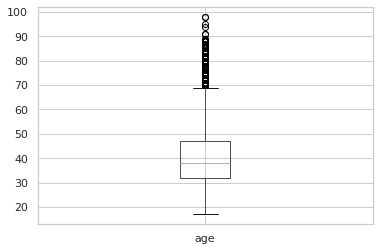

In [83]:
#Checking for outliers in "age"
df.boxplot(column=['age'])

Removing the outliers in age would affect the overall result as the outlier count is almost half the total dataset. Thus, we can decide to replace the missing values using the Inter Quartile Range

Previous Shape With Outlier:  (38245, 19)
Q1 & Q3 32.0 47.0
15.0
9.5 69.5
Shape After Removing Outliers: (38245, 19)


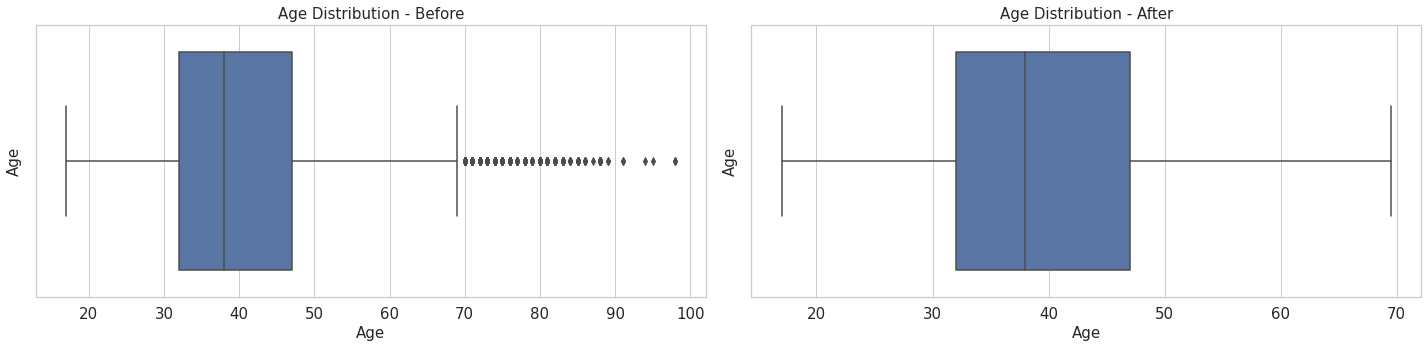

In [84]:
import warnings
warnings.filterwarnings("ignore")

numeric_col = df.select_dtypes(include=['int', 'float']).columns
print("Previous Shape With Outlier: ",df.shape)
Q1 = df.age.quantile(0.25)
Q3 = df.age.quantile(0.75)
print('Q1 & Q3',Q1,Q3)
IQR = Q3-Q1
print(IQR)

lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
print(lower_limit,upper_limit)

df_copy = df.copy()
df_copy['age'] = np.where(df_copy['age']>upper_limit,upper_limit,df_copy['age'])
df_copy['age'] = np.where(df_copy['age']<lower_limit,lower_limit,df_copy['age'])
print("Shape After Removing Outliers:", df_copy.shape)
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 5))

#Manipulating the boxplot views
sns.boxplot(x = 'age', data = df[numeric_col], orient = 'v', ax = ax1)
ax1.set_xlabel('Age', fontsize=15)
ax1.set_ylabel('Age', fontsize=15)
ax1.set_title('Age Distribution - Before', fontsize=15)
ax1.tick_params(labelsize=15)

sns.boxplot(x = 'age', data = df_copy[numeric_col], orient = 'v', ax = ax2)
ax2.set_xlabel('Age', fontsize=15)
ax2.set_ylabel('Age', fontsize=15)
ax2.set_title('Age Distribution - After', fontsize=15)
ax2.tick_params(labelsize=15)

 
plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 


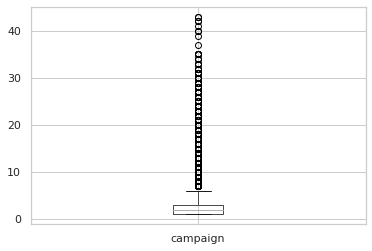

In [85]:
#Checking for outliers in "campaign"
df_copy.boxplot(column=['campaign'])

As campaign seems to have a lot outliers, reoving them would result in reducing the dataset immensely. So we can choose to replace them with the IQR method

Previous Shape With Outlier:  (38245, 19)
Q1 & Q3 1.0 3.0
2.0
-2.0 6.0
Shape After Removing Outliers: (38245, 19)


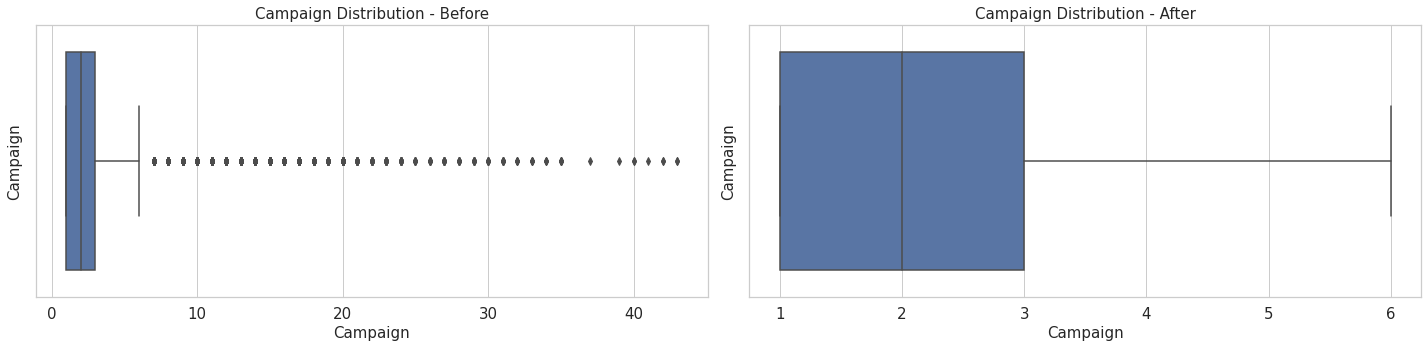

In [86]:
#Handling outliers in campaign column
print("Previous Shape With Outlier: ",df_copy.shape)
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 5))
sns.boxplot(x = 'campaign', data = df_copy[numeric_col], orient = 'v', ax = ax1)
ax1.set_xlabel('Campaign', fontsize=15)
ax1.set_ylabel('Campaign', fontsize=15)
ax1.set_title('Campaign Distribution - Before', fontsize=15)
ax1.tick_params(labelsize=15)

Q1 = df_copy.campaign.quantile(0.25)
Q3 = df_copy.campaign.quantile(0.75)
print('Q1 & Q3',Q1,Q3)
IQR = Q3-Q1
print(IQR)

lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
print(lower_limit,upper_limit)

df_copy['campaign'] = np.where(df_copy['campaign']>upper_limit,upper_limit,df_copy['campaign'])
df_copy['campaign'] = np.where(df_copy['campaign']<lower_limit,lower_limit,df_copy['campaign'])
print("Shape After Removing Outliers:", df_copy.shape)

#Manipulating the boxplot views

sns.boxplot(x = 'campaign', data = df_copy[numeric_col], orient = 'v', ax = ax2)
ax2.set_xlabel('Campaign', fontsize=15)
ax2.set_ylabel('Campaign', fontsize=15)
ax2.set_title('Campaign Distribution - After', fontsize=15)
ax2.tick_params(labelsize=15)

 
plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

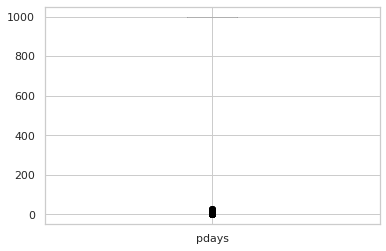

In [87]:
#Checking for outliers in "pdays"
df_copy.boxplot(column=['pdays'])

In pdays, 999 means that the client was not previously contacted. This can be a valueable feature for the ML models. Therefore, chose to go ahead with pdays as it is.

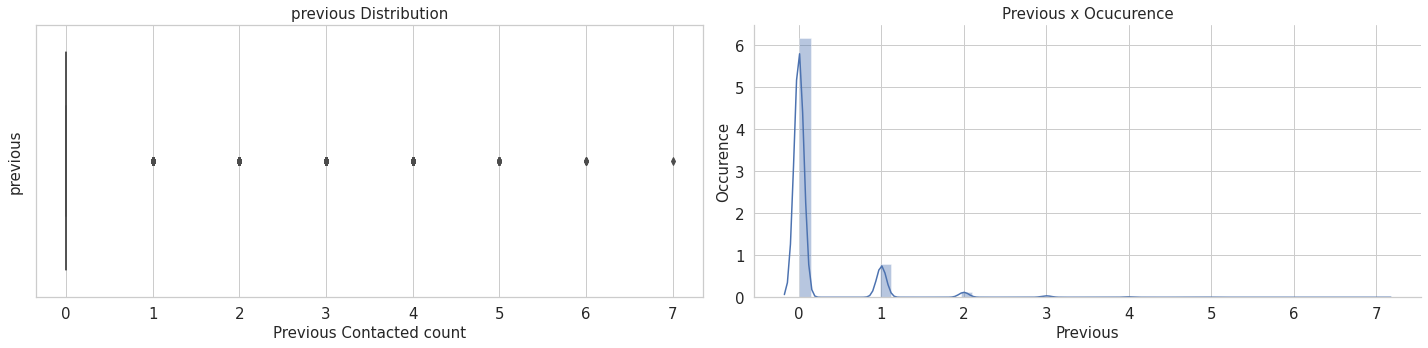

In [88]:
#Checking for outliers in "previous"
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 5))
cols_numerical = df_copy.select_dtypes(include=['int', 'float']).columns
sns.boxplot(x = 'previous', data = df_copy[cols_numerical], orient = 'v', ax = ax1)
ax1.set_xlabel('Previous Contacted count', fontsize=15)
ax1.set_ylabel('previous', fontsize=15)
ax1.set_title('previous Distribution', fontsize=15)
ax1.tick_params(labelsize=15)

sns.distplot(df_copy[cols_numerical]['previous'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('Previous', fontsize=15)
ax2.set_ylabel('Occurence', fontsize=15)
ax2.set_title('Previous x Ocucurence', fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

Number of previous contacts are distributed between 0 times and 7 times.
This would not be manipulated as that might make it loose almost all the data in previous column

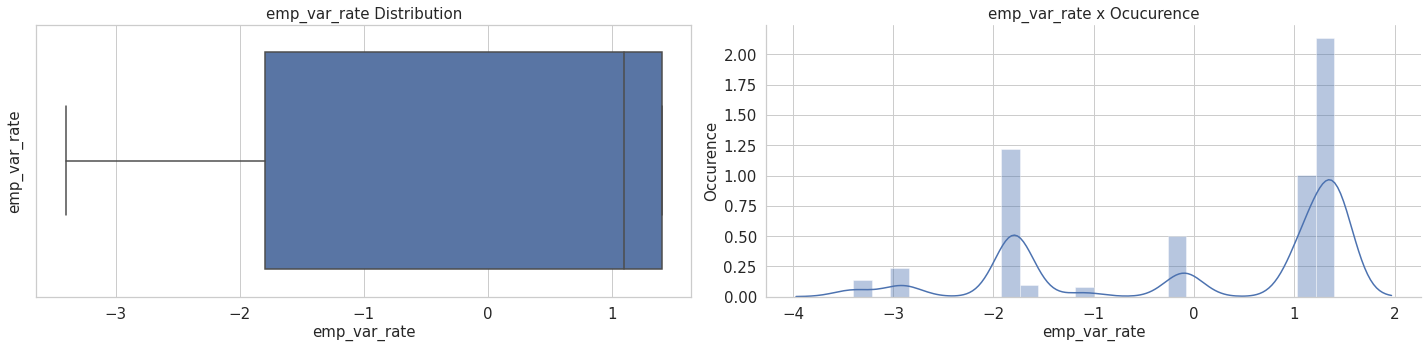

In [89]:
#Checking for outliers in "emp_var_rate"
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 5))
cols_numerical = df_copy.select_dtypes(include=['int', 'float']).columns
sns.boxplot(x = 'emp_var_rate', data = df_copy[cols_numerical], orient = 'v', ax = ax1)
ax1.set_xlabel('emp_var_rate', fontsize=15)
ax1.set_ylabel('emp_var_rate', fontsize=15)
ax1.set_title('emp_var_rate Distribution', fontsize=15)
ax1.tick_params(labelsize=15)

sns.distplot(df_copy[cols_numerical]['emp_var_rate'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('emp_var_rate', fontsize=15)
ax2.set_ylabel('Occurence', fontsize=15)
ax2.set_title('emp_var_rate x Ocucurence', fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

emp_var_rate has no visible outliers to be removed

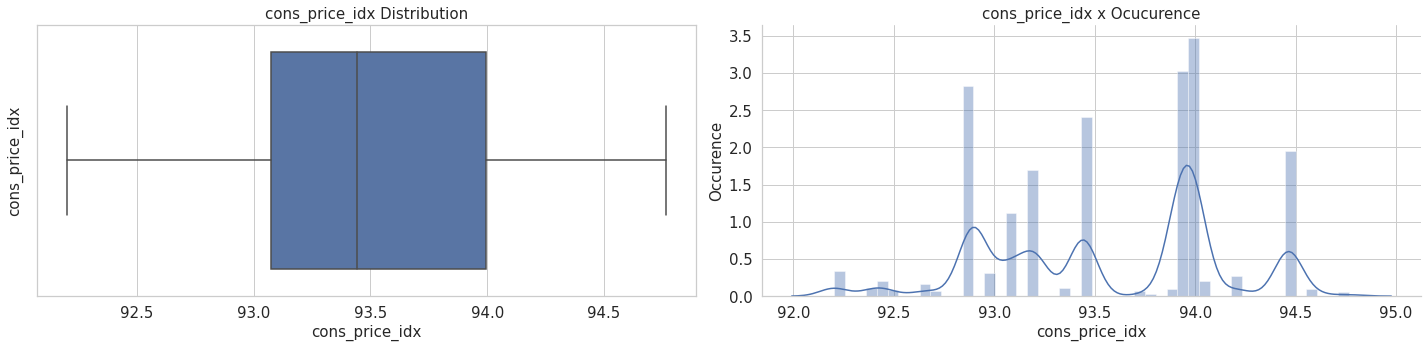

In [90]:
#Checking for outliers in "cons_price_idx"
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 5))
cols_numerical = df_copy.select_dtypes(include=['int', 'float']).columns
sns.boxplot(x = 'cons_price_idx', data = df_copy[cols_numerical], orient = 'v', ax = ax1)
ax1.set_xlabel('cons_price_idx', fontsize=15)
ax1.set_ylabel('cons_price_idx', fontsize=15)
ax1.set_title('cons_price_idx Distribution', fontsize=15)
ax1.tick_params(labelsize=15)

sns.distplot(df_copy[cols_numerical]['cons_price_idx'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('cons_price_idx', fontsize=15)
ax2.set_ylabel('Occurence', fontsize=15)
ax2.set_title('cons_price_idx x Ocucurence', fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

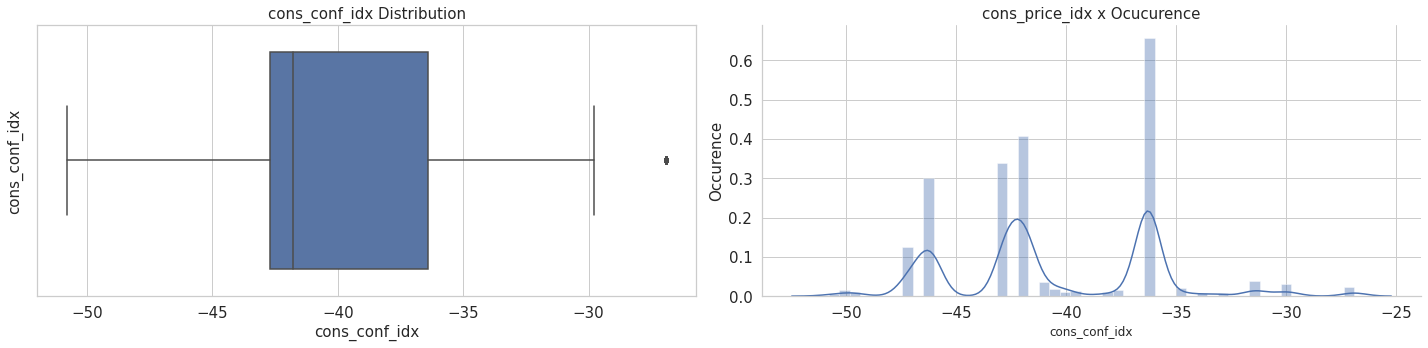

In [91]:
#Checking for outliers in "cons_conf_idx"
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 5))
cols_numerical = df_copy.select_dtypes(include=['int', 'float']).columns
sns.boxplot(x = 'cons_conf_idx', data = df_copy[cols_numerical], orient = 'v', ax = ax1)
ax1.set_xlabel('cons_conf_idx', fontsize=15)
ax1.set_ylabel('cons_conf_idx', fontsize=15)
ax1.set_title('cons_conf_idx Distribution', fontsize=15)
ax1.tick_params(labelsize=15)

sns.distplot(df_copy[cols_numerical]['cons_conf_idx'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_ylabel('Occurence', fontsize=15)
ax2.set_title('cons_price_idx x Ocucurence', fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

Handling outliers in cons_conf_idx by replacing the outliers with IQR values

Previous Shape With Outlier:  (38245, 19)
Q1 & Q3 -42.7 -36.4
6.300000000000004
-52.150000000000006 -26.949999999999992
Shape After Removing Outliers: (38245, 19)


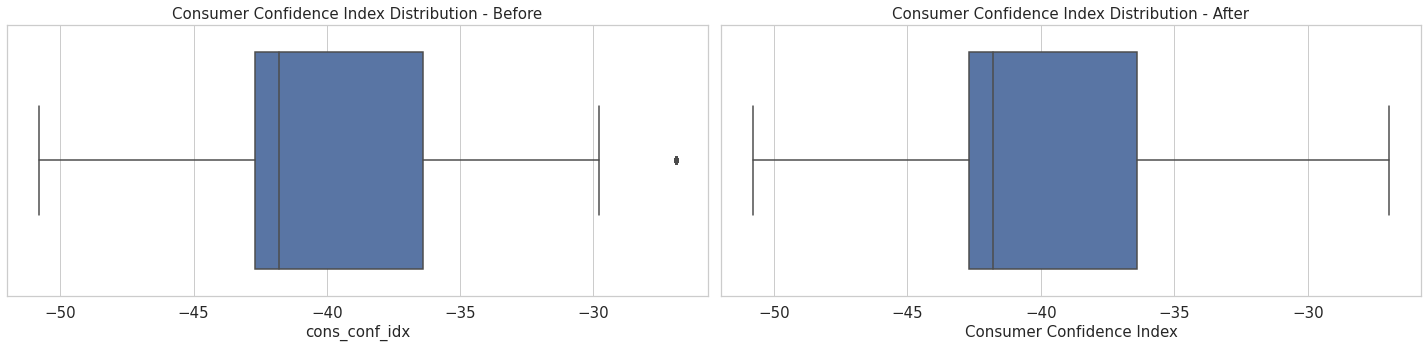

In [93]:
#Handling outliers for Consumer Confidence Index

print("Previous Shape With Outlier: ",df_copy.shape)
Q1 = df_copy.cons_conf_idx.quantile(0.25)
Q3 = df_copy.cons_conf_idx.quantile(0.75)
print('Q1 & Q3',Q1,Q3)
IQR = Q3-Q1
print(IQR)

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
print(lower_limit,upper_limit)


df_copy['cons_conf_idx'] = np.where(df_copy['cons_conf_idx']>upper_limit,upper_limit,df_copy['cons_conf_idx'])
df_copy['cons_conf_idx'] = np.where(df_copy['cons_conf_idx']<lower_limit,lower_limit,df_copy['cons_conf_idx'])
print("Shape After Removing Outliers:", df_copy.shape)
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 5))

sns.boxplot(x = 'cons_conf_idx', data = df[numeric_col], orient = 'v', ax = ax1)
ax1.set_xlabel('cons_conf_idx', fontsize=15)
ax1.set_title('Consumer Confidence Index Distribution - Before', fontsize=15)
ax1.tick_params(labelsize=15)

sns.boxplot(x = 'cons_conf_idx', data = df_copy[numeric_col], orient = 'v', ax = ax2)
ax2.set_xlabel('Consumer Confidence Index', fontsize=15)
ax2.set_title('Consumer Confidence Index Distribution - After', fontsize=15)
ax2.tick_params(labelsize=15)

 
plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

# (a)ii. Produce Q-Q Plots and Histograms of the features, and apply the  transformations if required

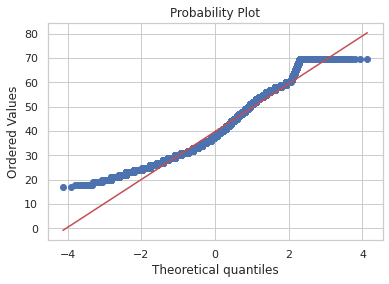

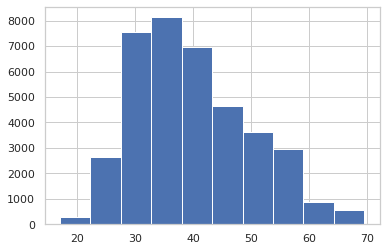

In [94]:
#Q-Q Plots for the feature "age"
# import the libraries
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd

#Q-Q Plot
stats.probplot(df_copy["age"], dist="norm", plot=plt)
plt.show()

#Histogram
df_copy['age'].hist()

The feature "age" is right skewed when we take a look at the histogram. Thus, we can apply the technique of **Transforming** Right Skewed Data using logarithm


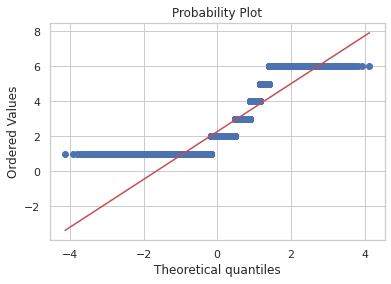

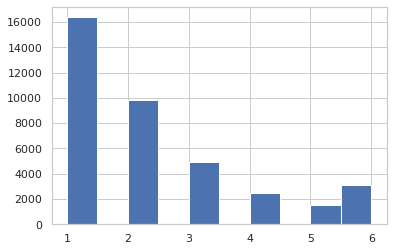

In [95]:
#Q-Q Plots for the feature "age"

stats.probplot(df_copy["campaign"], dist="norm", plot=plt)
plt.show()

#Histogram
df_copy['campaign'].hist()

The feature "campaign" is also right skewed when we take a look at the histogram. Thus, we can apply the technique of **Transforming** Right Skewed Data using logarithm


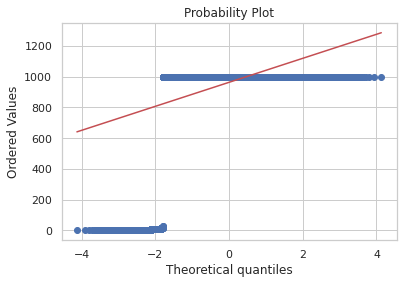

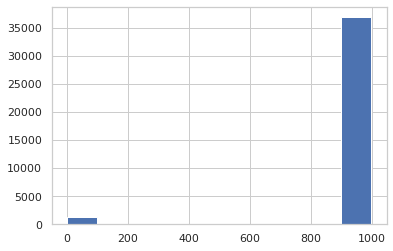

In [96]:
#Q-Q Plots for the feature "pdays"

stats.probplot(df_copy["pdays"], dist="norm", plot=plt)
plt.show()

#Histogram
df_copy['pdays'].hist()


*Pdays* is heavily left skewed. Exponential transformation can be used to transform for left skewed data

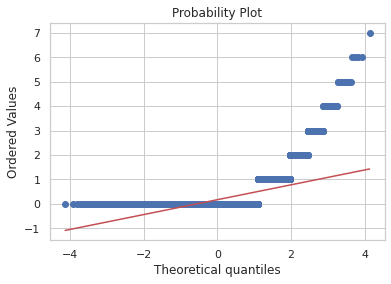

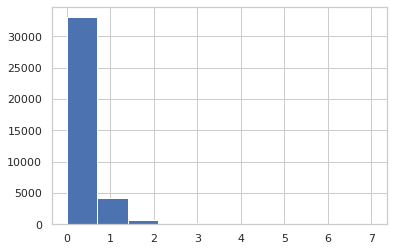

In [97]:
#Q-Q Plots for the feature "previous"

stats.probplot(df_copy["previous"], dist="norm", plot=plt)
plt.show()

#Histogram
df_copy['previous'].hist()

The feature "previous" is also right skewed when we take a look at the histogram. Thus, we can apply the technique of **Transforming** Right Skewed Data using logarithm


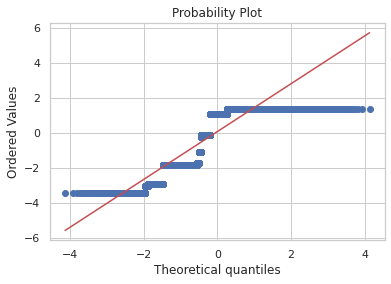

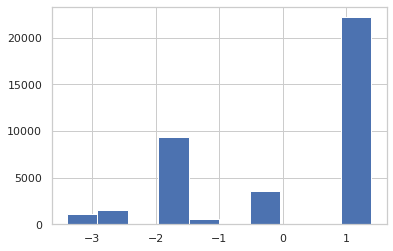

In [98]:
#Q-Q Plots for the feature "emp_var_rate"

stats.probplot(df_copy["emp_var_rate"], dist="norm", plot=plt)
plt.show()

#Histogram
df_copy['emp_var_rate'].hist()

emp_var_rate is  left skewed. Exponential transformation can be used to transform for left skewed data





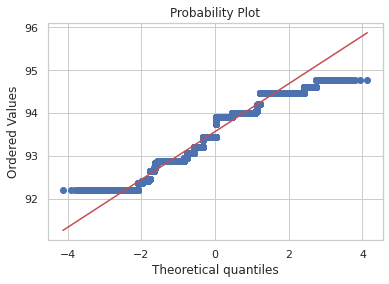

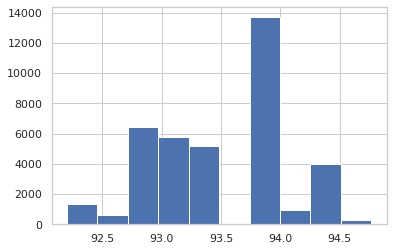

In [99]:
#Q-Q Plots for the feature "cons_price_idx"

stats.probplot(df_copy["cons_price_idx"], dist="norm", plot=plt)
plt.show()

#Histogram
df_copy['cons_price_idx'].hist()

The feature "cons_price_idx" is also right skewed when we take a look at the histogram. Thus, we can apply the technique of **Transforming** Right Skewed Data using logarithm


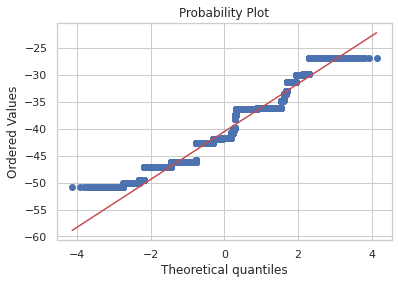

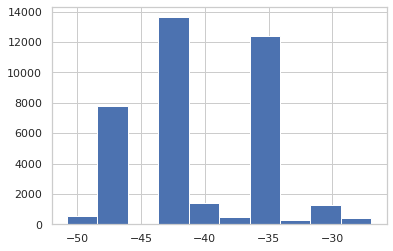

In [100]:
#Q-Q Plots for the feature "cons_conf_idx"

stats.probplot(df_copy["cons_conf_idx"], dist="norm", plot=plt)
plt.show()

#Histogram
df_copy['cons_conf_idx'].hist()

The feature "cons_conf_idx" is also right skewed when we take a look at the histogram. Thus, we can apply the technique of **Transforming** Right Skewed Data using logarithm


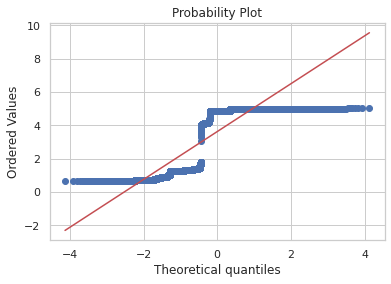

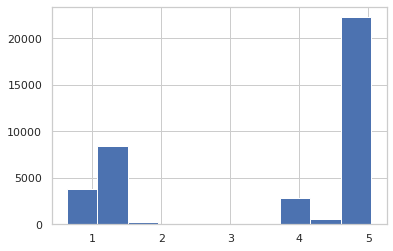

In [101]:
#Q-Q Plots for the feature "euribor3m"

stats.probplot(df_copy["euribor3m"], dist="norm", plot=plt)
plt.show()

#Histogram
df_copy['euribor3m'].hist()

euribor3m is  left skewed. Exponential transformation can be used to transform for left skewed data

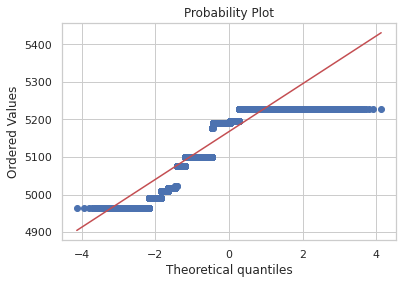

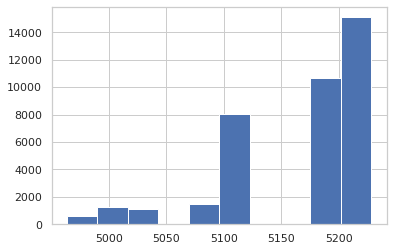

In [103]:
#Q-Q Plots for the feature "nr_employed"

stats.probplot(df_copy["nr_employed"], dist="norm", plot=plt)
plt.show()

#Histogram
df_copy['nr_employed'].hist()

nr_employed is  left skewed. Exponential transformation can be used to transform for left skewed data

# **All Right Skewed features will be transformed using Logarithmic transformation method**

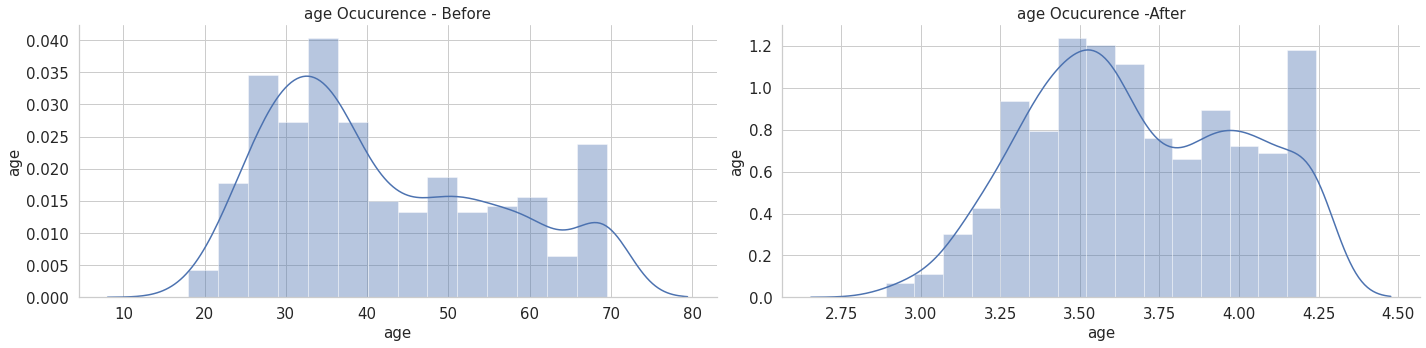

In [104]:
from sklearn.preprocessing import FunctionTransformer
# load your data
data = df_copy
data = data.replace(0, np.nan) #replace 0 s with nan because ln
data = data.dropna() #drop all nan
columns = ['age','campaign', 'previous', 'cons_price_idx']

# create the function transformer object with logarithm transformation
logarithm_transformer = FunctionTransformer(np.log, validate=True)

# apply the transformation to the data
data_new = logarithm_transformer.transform(data[columns])
df_new = pd.DataFrame(data_new, columns=columns)

#histograms for 'age' Before & After the transformation
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 5))

sns.distplot(data[numeric_col]['age'], ax = ax1)
sns.despine(ax = ax1)
ax1.set_xlabel('age', fontsize=15)
ax1.set_ylabel('age', fontsize=15)
ax1.set_title('age Ocucurence - Before', fontsize=15)
ax1.tick_params(labelsize=15)

sns.distplot(df_new[columns]['age'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('age', fontsize=15)
ax2.set_ylabel('age', fontsize=15)
ax2.set_title('age Ocucurence -After', fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

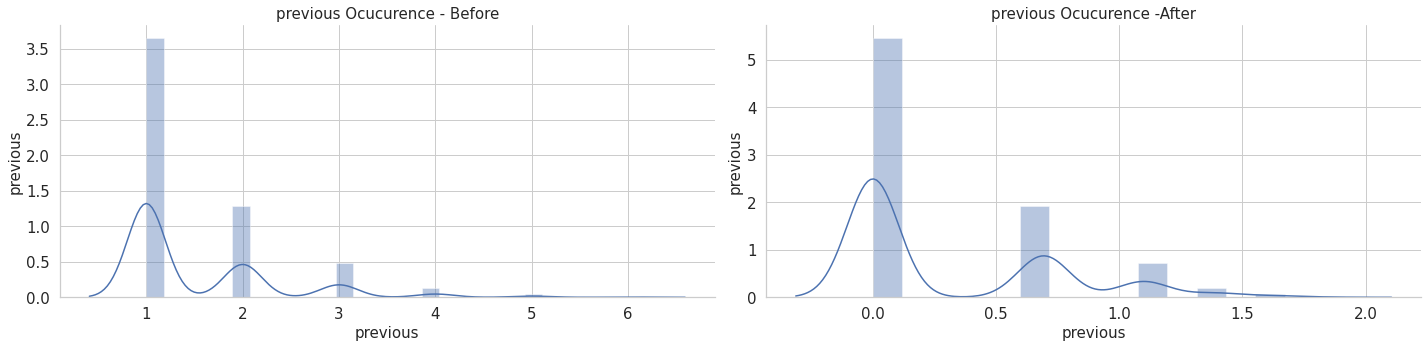

In [105]:
#histograms for 'campaign' Before & After the transformation
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 5))

sns.distplot(data[numeric_col]['previous'], ax = ax1)
sns.despine(ax = ax1)
ax1.set_xlabel('previous', fontsize=15)
ax1.set_ylabel('previous', fontsize=15)
ax1.set_title('previous Ocucurence - Before', fontsize=15)
ax1.tick_params(labelsize=15)

sns.distplot(df_new[columns]['previous'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('previous', fontsize=15)
ax2.set_ylabel('previous', fontsize=15)
ax2.set_title('previous Ocucurence -After', fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

In [ ]:
data.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
2,28.0,management,single,university.degree,no,yes,no,cellular,jun,thu,3.0,6.0,2.0,-1.7,94.055,-39.80,0.729,4991.6,1.0
4,55.0,retired,married,basic.4y,no,yes,no,cellular,aug,fri,1.0,3.0,1.0,-2.9,92.201,-31.40,0.869,5076.2,1.0
8,36.0,admin.,married,university.degree,no,no,no,cellular,jun,mon,1.0,3.0,1.0,-2.9,92.963,-40.80,1.266,5076.2,1.0
96,38.0,admin.,single,high.school,no,yes,no,cellular,apr,thu,1.0,6.0,1.0,-1.8,93.749,-34.60,0.659,5008.7,1.0
117,24.0,admin.,single,university.degree,no,no,no,cellular,aug,fri,1.0,999.0,2.0,-1.7,94.027,-38.30,0.905,4991.6,1.0
180,50.0,self-employed,married,basic.9y,no,yes,yes,cellular,may,mon,6.0,3.0,1.0,-1.8,92.893,-46.20,1.354,5099.1,1.0
243,59.0,admin.,divorced,professional.course,no,no,no,cellular,aug,tue,1.0,999.0,1.0,-2.9,92.201,-31.40,0.883,5076.2,1.0
334,69.5,retired,married,basic.4y,no,no,no,cellular,oct,tue,1.0,999.0,2.0,-3.4,92.431,-26.95,0.742,5017.5,1.0
346,41.0,self-employed,married,basic.9y,no,yes,no,cellular,may,thu,3.0,999.0,1.0,-1.8,92.893,-46.20,1.327,5099.1,1.0
396,34.0,self-employed,married,university.degree,no,no,no,cellular,oct,wed,1.0,5.0,3.0,-3.4,92.431,-26.95,0.740,5017.5,1.0


In [106]:
#replacing age & campaign column data with transformed data
data['age'] = df_new['age']
data['campaign'] = df_new['campaign']

In [108]:
#exponential_transformation for left skewed data
exponential_transformer = FunctionTransformer(np.exp)
columns2 = ['pdays', 'emp_var_rate']

data2 = data.copy()

data_new2 = exponential_transformer.transform(data2[columns2])
df_new2 = pd.DataFrame(data_new2, columns=columns2)
df_new2.head(2)


,pdays,emp_var_rate
2,403.428793,0.182684
4,20.085537,0.055023


In [ ]:
#replacing 'pdays', 'emp_var_rate' column data with transformed data
data['pdays'] = df_new2['pdays']
data['emp_var_rate'] = df_new2['emp_var_rate']

In [109]:
data.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
2,3.583519,management,single,university.degree,no,yes,no,cellular,jun,thu,0.000000,6.0,2.0,-1.7,94.055,-39.80,0.729,4991.6,1.0
4,3.178054,retired,married,basic.4y,no,yes,no,cellular,aug,fri,0.000000,3.0,1.0,-2.9,92.201,-31.40,0.869,5076.2,1.0
8,3.713572,admin.,married,university.degree,no,no,no,cellular,jun,mon,1.098612,3.0,1.0,-2.9,92.963,-40.80,1.266,5076.2,1.0
96,3.218876,admin.,single,high.school,no,yes,no,cellular,apr,thu,0.693147,6.0,1.0,-1.8,93.749,-34.60,0.659,5008.7,1.0
117,3.583519,admin.,single,university.degree,no,no,no,cellular,aug,fri,0.000000,999.0,2.0,-1.7,94.027,-38.30,0.905,4991.6,1.0
180,3.637586,self-employed,married,basic.9y,no,yes,yes,cellular,may,mon,0.000000,3.0,1.0,-1.8,92.893,-46.20,1.354,5099.1,1.0
243,4.174387,admin.,divorced,professional.course,no,no,no,cellular,aug,tue,0.693147,999.0,1.0,-2.9,92.201,-31.40,0.883,5076.2,1.0
334,3.806662,retired,married,basic.4y,no,no,no,cellular,oct,tue,0.000000,999.0,2.0,-3.4,92.431,-26.95,0.742,5017.5,1.0
346,3.891820,self-employed,married,basic.9y,no,yes,no,cellular,may,thu,1.098612,999.0,1.0,-1.8,92.893,-46.20,1.327,5099.1,1.0
396,4.241327,self-employed,married,university.degree,no,no,no,cellular,oct,wed,0.000000,5.0,3.0,-3.4,92.431,-26.95,0.740,5017.5,1.0


# (a) iii. If it is required, apply suitable feature coding techniques. 


In [110]:
#Analyze the data
data.dtypes

age               float64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
campaign          float64
pdays             float64
previous          float64
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
nr_employed       float64
y                 float64
dtype: object

In [142]:
df_copy['job_code'] = df_copy['job'].astype('category').cat.codes
df_copy['marital_code'] = df_copy['marital'].astype('category').cat.codes
df_copy['education_code'] = df_copy['education'].astype('category').cat.codes
df_copy['default_code'] = df_copy['default'].astype('category').cat.codes
df_copy['housing_code'] = df_copy['housing'].astype('category').cat.codes
df_copy['loan_code'] = df_copy['loan'].astype('category').cat.codes
df_copy['contact_code'] = df_copy['contact'].astype('category').cat.codes
df_copy['month_code'] = df_copy['month'].astype('category').cat.codes
df_copy['day_of_week_code'] = df_copy['day_of_week'].astype('category').cat.codes
df_copy.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y,job_code,marital_code,education_code,default_code,housing_code,loan_code,contact_code,month_code,day_of_week_code
0,44.0,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,1.0,999,0,1.4,93.444,-36.1,4.963,5228.1,0,1,1,0,1,1,0,0,1,2
2,28.0,management,single,university.degree,no,yes,no,cellular,jun,thu,3.0,6,2,-1.7,94.055,-39.8,0.729,4991.6,1,4,2,6,0,1,0,0,4,2
3,39.0,services,married,high.school,no,no,no,cellular,apr,fri,2.0,999,0,-1.8,93.075,-47.1,1.405,5099.1,0,7,1,3,0,0,0,0,0,0
4,55.0,retired,married,basic.4y,no,yes,no,cellular,aug,fri,1.0,3,1,-2.9,92.201,-31.4,0.869,5076.2,1,5,1,0,0,1,0,0,1,0
5,30.0,management,divorced,basic.4y,no,yes,no,cellular,jul,tue,6.0,999,0,1.4,93.918,-42.7,4.961,5228.1,0,4,0,0,0,1,0,0,3,3
6,37.0,blue-collar,married,basic.4y,no,yes,no,cellular,may,thu,1.0,999,0,-1.8,92.893,-46.2,1.327,5099.1,0,1,1,0,0,1,0,0,6,2
7,39.0,blue-collar,divorced,basic.9y,no,yes,no,cellular,may,fri,1.0,999,0,-1.8,92.893,-46.2,1.313,5099.1,0,1,0,2,0,1,0,0,6,0
8,36.0,admin.,married,university.degree,no,no,no,cellular,jun,mon,1.0,3,1,-2.9,92.963,-40.8,1.266,5076.2,1,0,1,6,0,0,0,0,4,1
9,27.0,blue-collar,single,basic.4y,no,yes,no,cellular,apr,thu,2.0,999,1,-1.8,93.075,-47.1,1.410,5099.1,0,1,2,0,0,1,0,0,0,2
10,34.0,housemaid,single,university.degree,no,no,no,telephone,may,fri,2.0,999,0,1.1,93.994,-36.4,4.864,5191.0,0,3,2,6,0,0,0,1,6,0


Integer (Label) Encoding is used asit willnot add new columns and does not expand feature space

In [ ]:
#Verify the new categorical columns exist
data.dtypes

age                 float64
job                  object
marital              object
education            object
default              object
housing              object
loan                 object
contact              object
month                object
day_of_week          object
campaign            float64
pdays               float64
previous            float64
emp_var_rate        float64
cons_price_idx      float64
cons_conf_idx       float64
euribor3m           float64
nr_employed         float64
y                   float64
job_code               int8
marital_code           int8
education_code         int8
default_code           int8
housing_code           int8
loan_code              int8
contact_code           int8
month_code             int8
day_of_week_code       int8
dtype: object

Drop the textual columns as we have already encoded them and added as new columns




In [143]:
df_copy = df_copy.drop(['job','marital','education','default','housing','loan','contact','month','day_of_week'], axis=1)
df_copy.head(5)

,age,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y,job_code,marital_code,education_code,default_code,housing_code,loan_code,contact_code,month_code,day_of_week_code
0,44.0,1.0,999,0,1.4,93.444,-36.1,4.963,5228.1,0,1,1,0,1,1,0,0,1,2
2,28.0,3.0,6,2,-1.7,94.055,-39.8,0.729,4991.6,1,4,2,6,0,1,0,0,4,2
3,39.0,2.0,999,0,-1.8,93.075,-47.1,1.405,5099.1,0,7,1,3,0,0,0,0,0,0
4,55.0,1.0,3,1,-2.9,92.201,-31.4,0.869,5076.2,1,5,1,0,0,1,0,0,1,0
5,30.0,6.0,999,0,1.4,93.918,-42.7,4.961,5228.1,0,4,0,0,0,1,0,0,3,3


# Scaling features


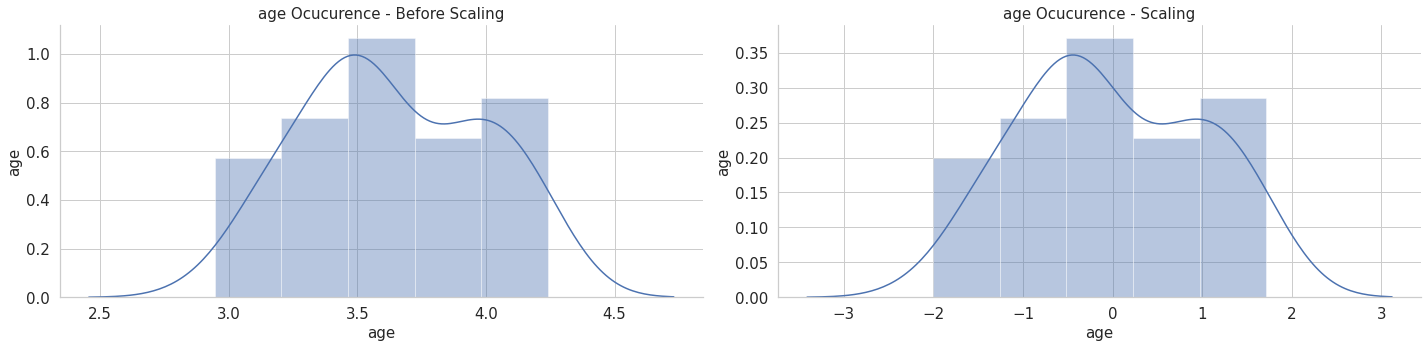

In [113]:
# Appliying scaling

from sklearn.preprocessing import StandardScaler

# create the scaler object
scaler = StandardScaler()
scaling_columns=['age', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx' ,'euribor3m', 'nr_employed']
scaled = pd.DataFrame(data, columns = ['age', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx' ,'euribor3m', 'nr_employed'])
# fit the scaler to the  data
scaler.fit(scaled)

train_scaled = scaler.transform(scaled)
scaled_df = pd.DataFrame(train_scaled)
# scaled_df.info()


fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 5))

sns.distplot(data[numeric_col]['age'], ax = ax1)
sns.despine(ax = ax1)
ax1.set_xlabel('age', fontsize=15)
ax1.set_ylabel('age', fontsize=15)
ax1.set_title('age Ocucurence - Before Scaling', fontsize=15)
ax1.tick_params(labelsize=15)

sns.distplot(scaled_df[0], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('age', fontsize=15)
ax2.set_ylabel('age', fontsize=15)
ax2.set_title('age Ocucurence - Scaling', fontsize=15)
ax2.tick_params(labelsize=15)

 
plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

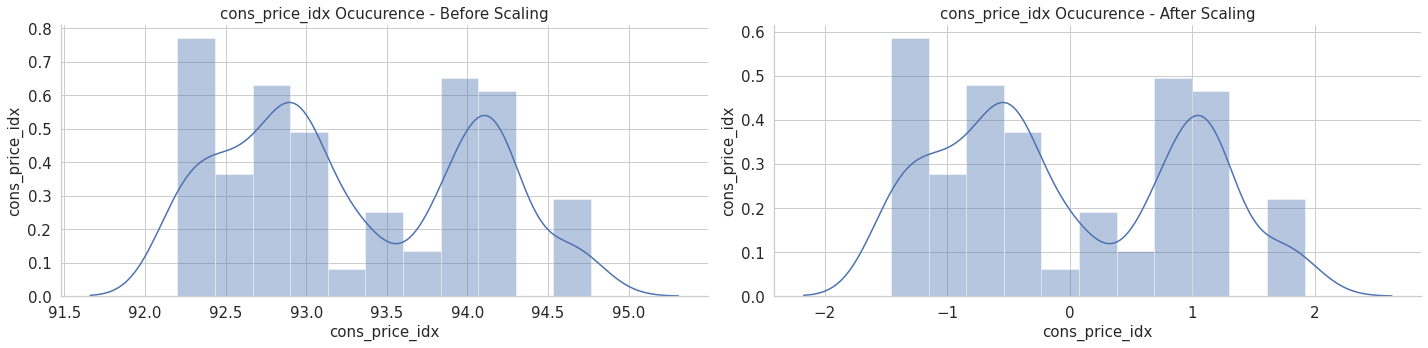

In [114]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 5))

sns.distplot(data[numeric_col]['cons_price_idx'], ax = ax1)
sns.despine(ax = ax1)
ax1.set_xlabel('cons_price_idx', fontsize=15)
ax1.set_ylabel('cons_price_idx', fontsize=15)
ax1.set_title('cons_price_idx Ocucurence - Before Scaling', fontsize=15)
ax1.tick_params(labelsize=15)

sns.distplot(scaled_df[2], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('cons_price_idx', fontsize=15)
ax2.set_ylabel('cons_price_idx', fontsize=15)
ax2.set_title('cons_price_idx Ocucurence - After Scaling', fontsize=15)
ax2.tick_params(labelsize=15)

 
plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

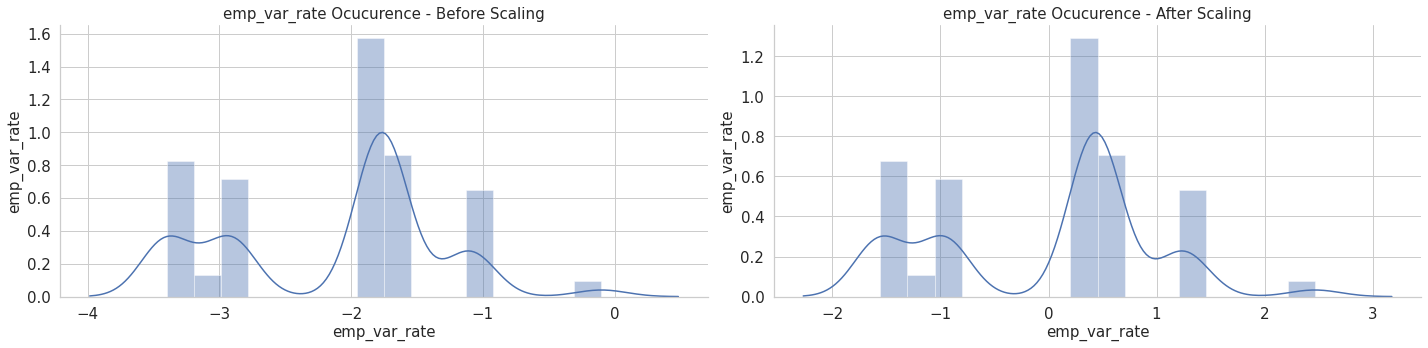

In [115]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 5))

sns.distplot(data[numeric_col]['emp_var_rate'], ax = ax1)
sns.despine(ax = ax1)
ax1.set_xlabel('emp_var_rate', fontsize=15)
ax1.set_ylabel('emp_var_rate', fontsize=15)
ax1.set_title('emp_var_rate Ocucurence - Before Scaling', fontsize=15)
ax1.tick_params(labelsize=15)

sns.distplot(scaled_df[1], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('emp_var_rate', fontsize=15)
ax2.set_ylabel('emp_var_rate', fontsize=15)
ax2.set_title('emp_var_rate Ocucurence - After Scaling', fontsize=15)
ax2.tick_params(labelsize=15)

 
plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

# (a)V. Feature discretization

In [116]:
import pandas as pd
from sklearn.preprocessing import KBinsDiscretizer


# create the scaler object
scaler = StandardScaler()


data5 = pd.DataFrame(data, columns=['age'])
data5 = data5.dropna()
# fit the scaler to the  data
discretizer = KBinsDiscretizer(n_bins=8, encode='ordinal', strategy='kmeans') 
discretizer.fit(data5)
_discretize = discretizer.transform(data5)
df_discret = pd.DataFrame(_discretize)
df_discret




,0
0,4.0
1,1.0
2,4.0
3,1.0
4,4.0
5,4.0
6,7.0
7,5.0
8,5.0
9,7.0


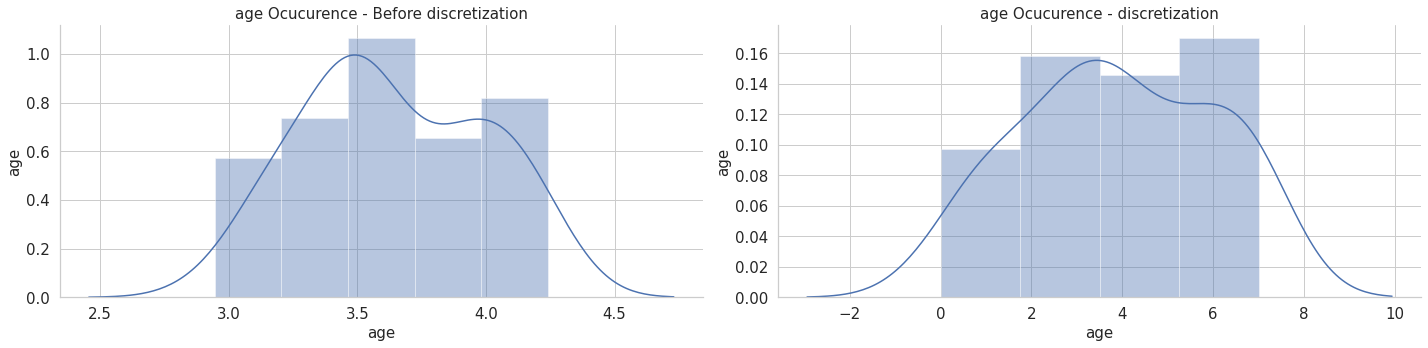

In [117]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 5))

sns.distplot(data[numeric_col]['age'], ax = ax1)
sns.despine(ax = ax1)
ax1.set_xlabel('age', fontsize=15)
ax1.set_ylabel('age', fontsize=15)
ax1.set_title('age Ocucurence - Before discretization', fontsize=15)
ax1.tick_params(labelsize=15)

sns.distplot(df_discret[0], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('age', fontsize=15)
ax2.set_ylabel('age', fontsize=15)
ax2.set_title('age Ocucurence - discretization', fontsize=15)
ax2.tick_params(labelsize=15)

 
plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

# (b) I.SVD (Singular Value Decomposition) for feature reduction. 

In [118]:
# calculate the  SVD for the data X
data_set = data.copy()

U_boston,S_boston,Vt_boston = np.linalg.svd(data_set, full_matrices=False)

#numpy.linalg.svd actually returns a Σ that is not a diagonal matrix, but a list of the entries on the diagonal.
num_sv_boston = np.arange(1, S_boston.size+1)
cum_var_explained_boston = [np.sum(np.square(S_boston[0:n])) / np.sum(np.square(S_boston)) for n in num_sv_boston]
print(S_boston)
print(S_boston.size)

[3.46400509e+04 3.15136821e+03 4.23953343e+01 2.59854379e+01
 1.74798177e+01 1.49525432e+01 9.73918527e+00 8.95707676e+00
 5.82949433e+00 4.60350670e+00 3.71214297e+00 3.51163399e+00
 2.58473847e+00 2.05063880e+00 1.70075409e+00 1.32353994e+00
 9.10165980e-01 4.40715973e-03 1.46269774e-16]
19


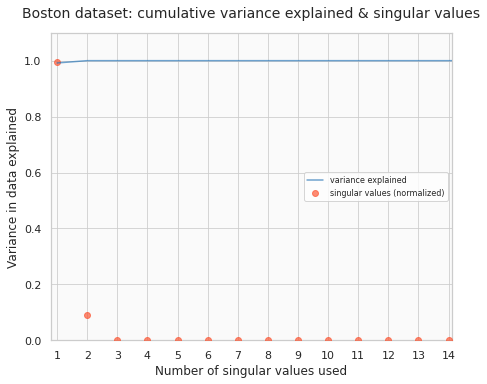

In [119]:
import matplotlib.pyplot as plt
import sklearn.datasets
import sklearn.preprocessing
fig = plt.figure(figsize=(7.0,5.5))
ax = fig.add_subplot(111)

plt.plot(num_sv_boston,
         cum_var_explained_boston,
         color='#2171b5',
         label='variance explained',
         alpha=0.65,
         zorder=1000)

plt.scatter(num_sv_boston,
            sklearn.preprocessing.normalize(S_boston.reshape((1,-1))),
            color='#fc4e2a',
            label='singular values (normalized)',
            alpha=0.65,
            zorder=1000)

plt.legend(loc='center right', scatterpoints=1, fontsize=8)

ax.set_xticks(num_sv_boston)
ax.set_xlim(0.8, 14.1)
ax.set_ylim(0.0, 1.1)
ax.set_xlabel('Number of singular values used')
ax.set_ylabel('Variance in data explained')
ax.set_title('Boston dataset: cumulative variance explained & singular values',
             fontsize=14,
             y=1.03)

ax.set_facecolor('0.98')

plt.grid(alpha=0.8, zorder=1)
plt.tight_layout()

# Applying Logistic Regression and Support Vector Machine techniques

dropping y column from the data set for testing

In [144]:
y_true = df_copy['y']
X = df_copy.drop('y', axis=1)

In [135]:
y_true.head(5)

2      1.0
4      1.0
8      1.0
96     1.0
117    1.0
Name: y, dtype: float64

Splitting test and training data sets

In [164]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=0)
X_class_train, X_test, y_class_train, y_test = train_test_split(X, y_true, test_size=0.2, random_state=0)
columns = X_class_train.columns

data_X, data_y = os.fit_resample(X_class_train, y_class_train)

smoted_X = pd.DataFrame(data=data_X,columns=columns )
smoted_y= pd.DataFrame(data=data_y,columns=['y'])

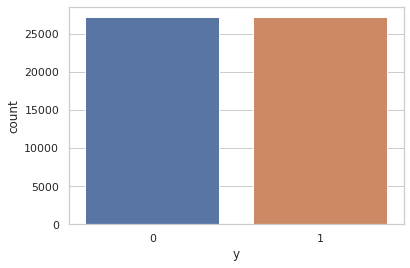

In [148]:
sns.countplot(x='y', data=smoted_y)
plt.show()

In [165]:
X_train = smoted_X
y_train = smoted_y
X_test
y_test

24494    0
38606    0
13821    0
2155     0
30042    0
        ..
27973    0
29677    0
6408     0
2453     0
5262     0
Name: y, Length: 7649, dtype: int64

Training the dataset with Logistic Regression





In [168]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
model = logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.75      0.84      6794
           1       0.26      0.68      0.37       855

    accuracy                           0.74      7649
   macro avg       0.60      0.72      0.60      7649
weighted avg       0.87      0.74      0.79      7649



#  statistical significance of the findings

In [169]:
metrics.accuracy_score(y_test, preds)

0.8109556804811087

In [153]:
print(confusion_matrix(y_test,y_pred))

[[5094 1700]
 [ 272  583]]


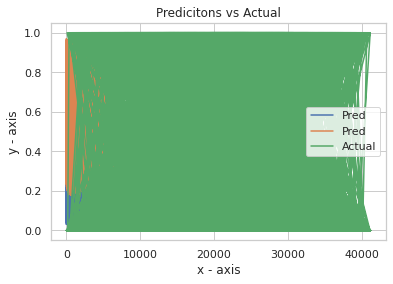

In [163]:
import matplotlib.pyplot as plt
plt.plot(y_pred, label = "Pred")
plt.plot(y_test, label = "Actual")
plt.xlabel('x - axis')
# Set the y axis label of the current axis.
plt.ylabel('y - axis')
# Set a title of the current axes.
plt.title('Predicitons vs Actual')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

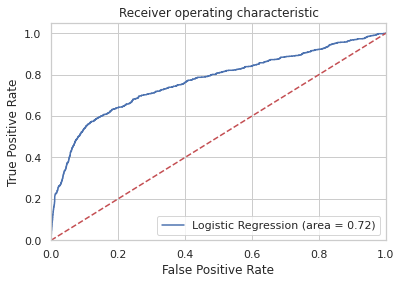

In [155]:
#ROC CUrve LR

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

(0.0, 1.0)

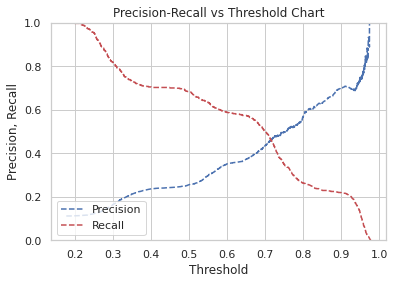

In [156]:
y_pred = logreg.predict_proba(X_test)
y_pred #The column 0 is the probability for class 0 and the column 1 is the probability for the class 1. If you have n classes the output probabilities shape will be (n_examples, n_classes).

from sklearn import metrics
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_pred[:,1])  #retrieve probability of being 1(in second column of probs_y)
pr_auc = metrics.auc(recall, precision)

plt.title("Precision-Recall vs Threshold Chart")
plt.plot(thresholds, precision[: -1], "b--", label="Precision")
plt.plot(thresholds, recall[: -1], "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
plt.ylim([0,1])

In [180]:
#root mean squared error LR
from sklearn.metrics import mean_squared_error
rms = np.sqrt(mean_squared_error(y_test,preds))
print(rms)

0.4347922716871717


Training the dataset with **[SVM]**

In [178]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.svm import SVC

model_svm = SVC(kernel='linear') 
model_svm.fit(X_train,y_train)
preds = model_svm.predict(X_test)
metrics.accuracy_score(y_test, preds)



0.8109556804811087

In [170]:
#confusion matrix , evaluation
print(confusion_matrix(y_test,preds))

[[5701 1093]
 [ 353  502]]


In [171]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.94      0.84      0.89      6794
           1       0.31      0.59      0.41       855

    accuracy                           0.81      7649
   macro avg       0.63      0.71      0.65      7649
weighted avg       0.87      0.81      0.83      7649



(0.0, 1.0)

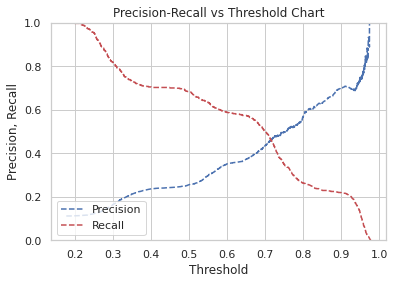

In [172]:
y_pred = logreg.predict_proba(X_test)
y_pred #The column 0 is the probability for class 0 and the column 1 is the probability for the class 1. If you have n classes the output probabilities shape will be (n_examples, n_classes).

from sklearn import metrics
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_pred[:,1])  #retrieve probability of being 1(in second column of probs_y)
pr_auc = metrics.auc(recall, precision)

plt.title("Precision-Recall vs Threshold Chart")
plt.plot(thresholds, precision[: -1], "b--", label="Precision")
plt.plot(thresholds, recall[: -1], "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
plt.ylim([0,1])

# Evaluate the signifncance of the features

In [161]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.94      0.84      0.89      6794
           1       0.31      0.59      0.41       855

    accuracy                           0.81      7649
   macro avg       0.63      0.71      0.65      7649
weighted avg       0.87      0.81      0.83      7649



                       age  campaign  ...  day_of_week_code      MEDV
age               1.000000  0.004124  ...         -0.018721  0.021775
campaign          0.004124  1.000000  ...         -0.053519 -0.066827
pdays            -0.031600  0.057497  ...         -0.008175 -0.319351
previous          0.020978 -0.081660  ...         -0.004482  0.221159
emp_var_rate      0.008260  0.148144  ...          0.032926 -0.292265
cons_price_idx    0.004577  0.115014  ...          0.002583 -0.133084
cons_conf_idx     0.125476 -0.015081  ...          0.040086  0.051331
euribor3m         0.020149  0.128578  ...          0.038921 -0.300580
nr_employed      -0.006760  0.140767  ...          0.029894 -0.347830
job_code         -0.004145 -0.005976  ...         -0.002870  0.020569
marital_code     -0.397646 -0.011171  ...          0.003796  0.041535
education_code   -0.146225  0.003764  ...         -0.013620  0.054755
default_code      0.166061  0.038111  ...         -0.009527 -0.096116
housing_code     -0.

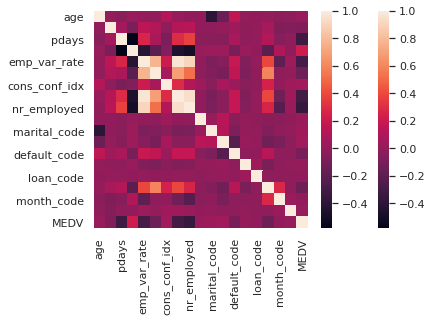

In [162]:
#test the signifncance of the features
import seaborn as sns
sns.heatmap(X.corr()); #Seems they can be assuemed as independent

d_data = X.copy()
d_data['MEDV'] = y_true
d_data.head(10)
print(d_data.corr())
sns.heatmap(d_data.corr()) #Seems we are ok with the signifncancy   

Darker the color of the heat map, the higher the correlation between the two variables.

In [176]:
#root mean squared error SVM
from sklearn.metrics import mean_squared_error
rms = np.sqrt(mean_squared_error(y_test,preds))
print(rms)

0.4347922716871717


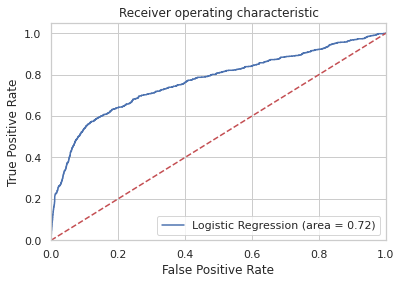

In [179]:
#ROC CUrve SVM

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()